Matplotlib is building the font cache; this may take a moment.


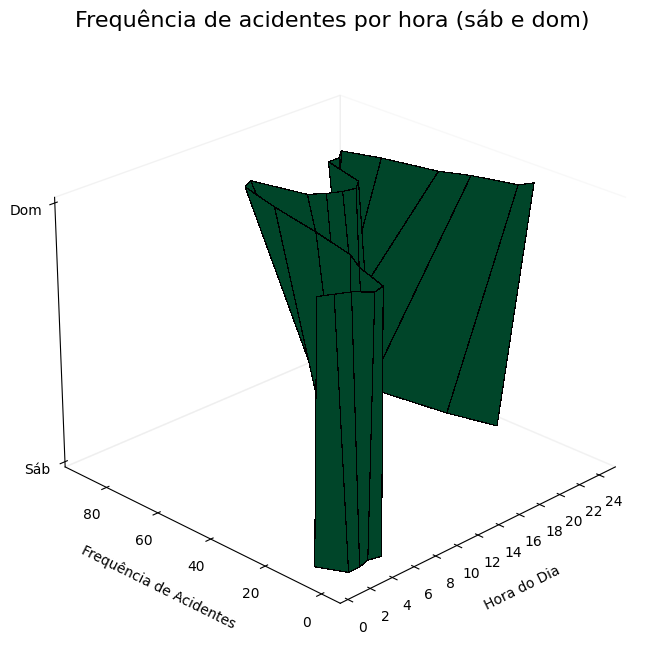

In [1]:
# Importar as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- 1. Geração de Dados Fictícios ---
# Vamos criar dados que se pareçam com o padrão da imagem.

# Eixo X: Horas de 1 a 24
horas = np.arange(1, 25)

# Eixo Z: Frequência de acidentes para Sábado e Domingo
# Sábado: picos de tarde e um pico maior à noite
freq_sabado = np.array([
    5, 2, 1, 2, 4, 8, 15, 25, 30, 28, 25, 35, # Madrugada e manhã
    40, 45, 50, 48, 55, 60, 75, 85, 90, 70, 50, 30  # Tarde e noite
]) + np.random.randint(-5, 5, 24) # Adiciona um pouco de ruído

# Domingo: picos de manhã e no final da tarde
freq_domingo = np.array([
    8, 4, 2, 3, 6, 12, 25, 40, 60, 75, 70, 60, # Madrugada e pico da manhã
    55, 50, 48, 55, 65, 70, 68, 55, 40, 30, 20, 15 # Tarde e noite
]) + np.random.randint(-5, 5, 24) # Adiciona um pouco de ruído

# Garante que não há valores negativos
freq_sabado[freq_sabado < 0] = 0
freq_domingo[freq_domingo < 0] = 0

# Eixo Y: Dias da semana (0 para Sábado, 1 para Domingo)
dias_idx = np.array([0, 1])

# --- 2. Preparação dos Dados para o Gráfico 3D ---
# Precisamos de uma "grade" (meshgrid) para a superfície
X, Y = np.meshgrid(horas, dias_idx)

# Combinamos os dados de frequência em uma única matriz Z
Z = np.array([freq_sabado, freq_domingo])

# --- 3. Criação do Gráfico ---
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotar a superfície
# cmap='YlGn' é um mapa de cores que vai do Amarelo (Yl) ao Verde (Gn), parecido com o exemplo
surf = ax.plot_surface(X, Z, Y, cmap='YlGn_r', rstride=1, cstride=1, antialiased=False, edgecolor='black', linewidth=0.1)

# --- 4. Customização do Gráfico (para ficar parecido com o exemplo) ---

# Título
ax.set_title('Frequência de acidentes por hora (sáb e dom)', fontsize=16)

# Rótulos dos eixos
ax.set_xlabel('Hora do Dia', labelpad=10)
ax.set_zlabel('Dia da semana', labelpad=10) # No Matplotlib, o eixo Y é o vertical por padrão
ax.set_ylabel('Frequência de Acidentes', labelpad=10)

# Ajustar os "ticks" (marcadores) dos eixos
ax.set_xticks(np.arange(0, 25, 2))
ax.set_zticks([0, 1]) # Posições dos ticks no eixo Z
ax.set_zticklabels(['Sáb', 'Dom']) # Rótulos de texto para os ticks do eixo Z

# Ajustar o ângulo de visão para se assemelhar ao da imagem
ax.view_init(elev=25, azim=-135)

# Remover o fundo cinza (panes) para um visual mais limpo
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(False)

# Adicionar uma barra de cores (legenda)
# fig.colorbar(surf, shrink=0.5, aspect=10, label='Quantidade de Acidentes')

# Mostrar o gráfico
plt.show()